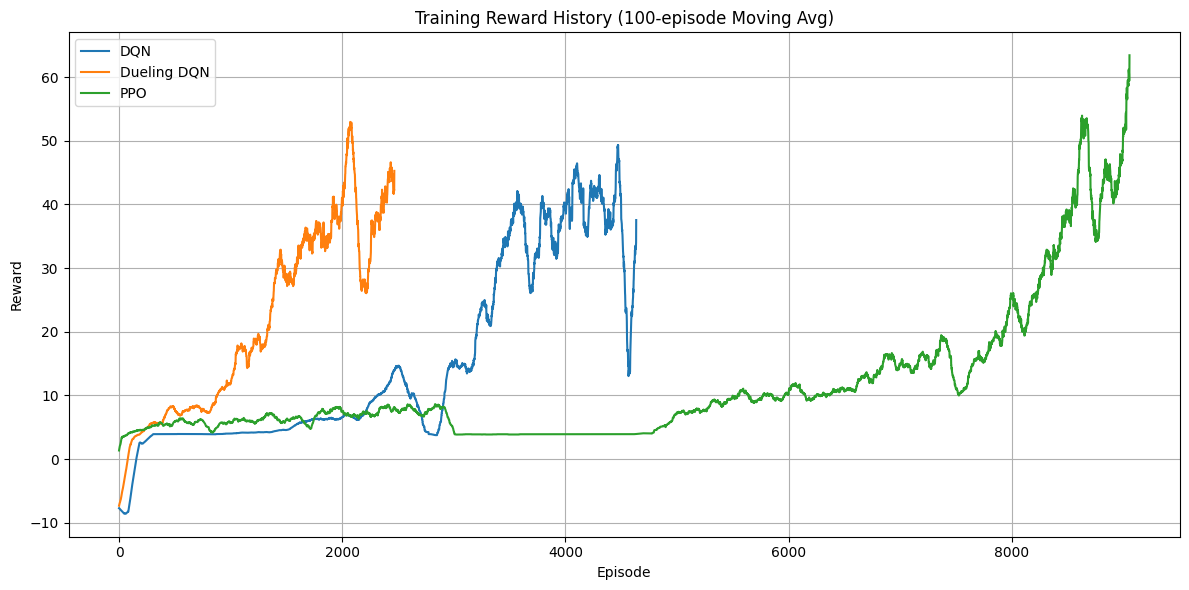

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

# Define result directories
root = Path("results")

runs = {
    "DQN": root / "DQN_lr0.0001_gam0.99_20250422_103631" / "metrics" / "reward_history.npy",
    "Dueling DQN": root / "DUELING_lr0.0001_gam0.99_20250422_105048" / "metrics" / "reward_history.npy",
    "PPO": root / "PPO_lr0.00025_gam0.99_20250422_122635" / "metrics" / "reward_history.npy"
}

# Plot
plt.figure(figsize=(12, 6))

for label, path in runs.items():
    if not path.exists():
        print(f"❌ Missing: {path}")
        continue
    rewards = np.load(path)
    moving_avg = np.convolve(rewards, np.ones(100)/100, mode='valid')  # 100-episode moving average
    plt.plot(moving_avg, label=label)

plt.title("Training Reward History (100-episode Moving Avg)")
plt.xlabel("Episode")
plt.ylabel("Reward")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("reward_comparison.png")
plt.show()


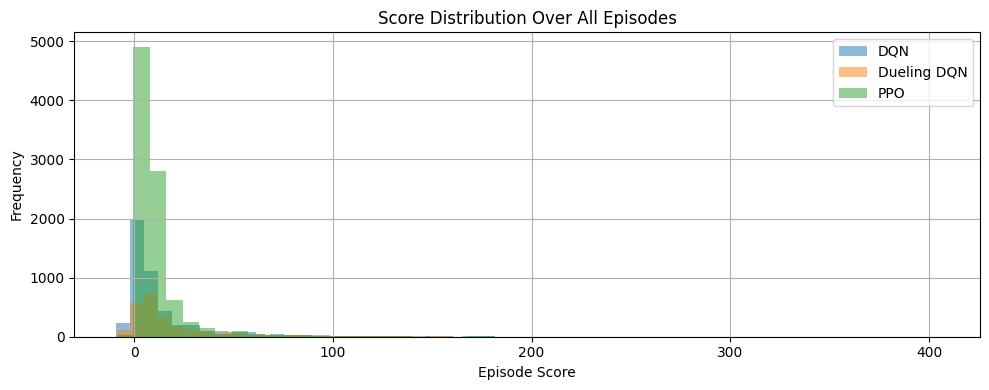

In [2]:
plt.figure(figsize=(10, 4))
for label, path in runs.items():
    if path.exists():
        rewards = np.load(path)
        plt.hist(rewards, bins=50, alpha=0.5, label=label)

plt.title("Score Distribution Over All Episodes")
plt.xlabel("Episode Score")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("score_distribution.png")
plt.show()


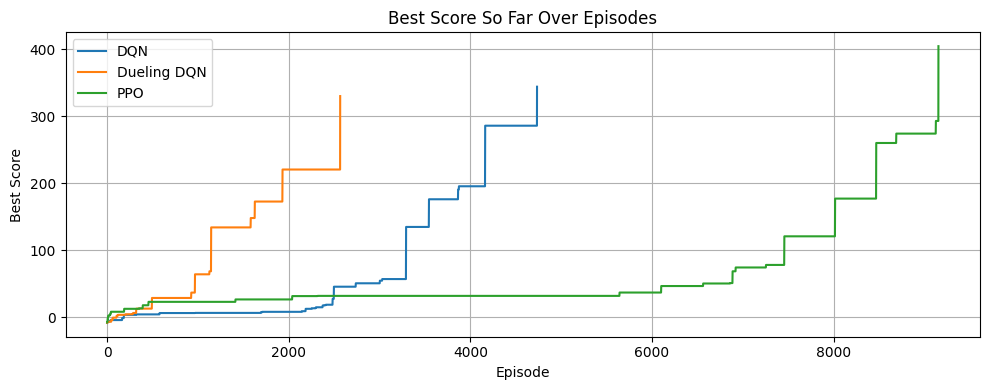

In [3]:
plt.figure(figsize=(10, 4))
for label, path in runs.items():
    if path.exists():
        rewards = np.load(path)
        best_so_far = np.maximum.accumulate(rewards)
        plt.plot(best_so_far, label=label)

plt.title("Best Score So Far Over Episodes")
plt.xlabel("Episode")
plt.ylabel("Best Score")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("best_score_progress.png")
plt.show()


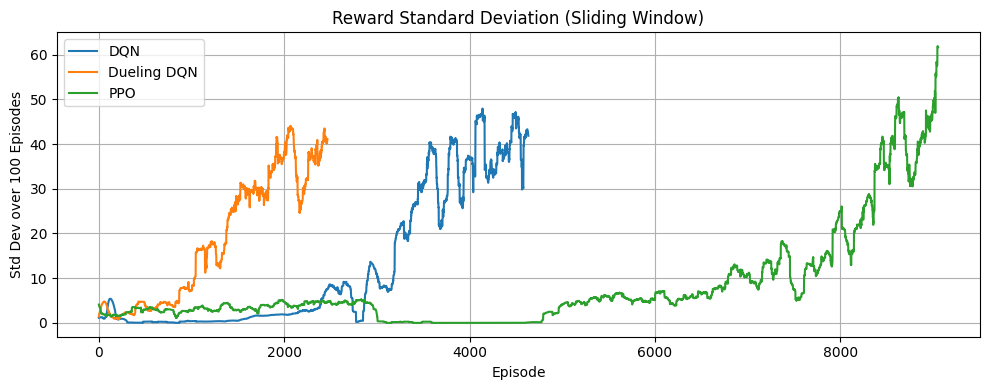

In [4]:
window_size = 100
plt.figure(figsize=(10, 4))
for label, path in runs.items():
    if path.exists():
        rewards = np.load(path)
        stds = [np.std(rewards[i:i+window_size]) for i in range(len(rewards)-window_size)]
        plt.plot(stds, label=label)

plt.title("Reward Standard Deviation (Sliding Window)")
plt.xlabel("Episode")
plt.ylabel("Std Dev over 100 Episodes")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("reward_stability.png")
plt.show()


In [7]:
from pathlib import Path

eval_dir = Path("results")
summary_lines = []

print("\n📊 === All Evaluation Summaries ===\n")

# Recursively search for all eval_*.txt files
for eval_file in eval_dir.rglob("eval_*.txt"):
    print(f"🔹 {eval_file.relative_to(eval_dir.parent)}")
    print("-" * 60)
    content = eval_file.read_text()
    print(content.strip())
    print("\n")
    summary_lines.append(f"# {eval_file.relative_to(eval_dir.parent)}\n{content.strip()}\n\n")

# Optional: Save combined summary to a text file
output_path = eval_dir / "all_eval_summary.txt"
with open(output_path, "w") as f:
    f.writelines(summary_lines)

print(f"✅ All summaries printed. Combined file saved to: {output_path}")



📊 === All Evaluation Summaries ===

🔹 results\DQN_lr0.0001_gam0.99_20250422_103631\eval_dqn_final_model.txt
------------------------------------------------------------
=== Evaluation Summary ===
Algorithm         : DQN
Model Path        : results/DQN_lr0.0001_gam0.99_20250422_103631/models/final_model.pth
Episodes Tested   : 100
Average Score     : 358.02
Max Score         : 1605
Median Score      : 235
Score Std Dev     : 371.38
% Episodes > 100  : 70.00%
% Episodes > 200  : 55.00%
% Episodes > 300  : 42.00%
Reached 300+      : Episode 5
Total Eval Time   : 87.42 sec


🔹 results\DUELING_lr0.0001_gam0.99_20250422_105048\eval_dueling_final_model.txt
------------------------------------------------------------
=== Evaluation Summary ===
Algorithm         : DUELING
Model Path        : results/DUELING_lr0.0001_gam0.99_20250422_105048/models/final_model.pth
Episodes Tested   : 100
Average Score     : 286.56
Max Score         : 1315
Median Score      : 190
Score Std Dev     : 273.04
% Epis